[View in Colaboratory](https://colab.research.google.com/github/findingfoot/ML_practice-codes/blob/master/Linear_SVMs.ipynb)

In [2]:
!pip install jupyterthemes


    100% |████████████████████████████████| 7.0MB 4.2MB/s 
    100% |████████████████████████████████| 9.0MB 764kB/s 
    100% |████████████████████████████████| 51kB 17.9MB/s 
    100% |████████████████████████████████| 1.0MB 20.0MB/s 
    100% |████████████████████████████████| 51kB 16.5MB/s 
  Running setup.py bdist_wheel for prometheus-client ... - \ done
  Stored in directory: /root/.cache/pip/wheels/04/6b/a4/4ccef2edcc797b5553edc6c8bed4d219dafdb019e225c2c348
Successfully built prometheus-client
  Found existing installation: pyzmq 16.0.4
    Uninstalling pyzmq-16.0.4:
      Successfully uninstalled pyzmq-16.0.4
  Found existing installation: notebook 5.2.2
    Uninstalling notebook-5.2.2:
      Successfully uninstalled notebook-5.2.2


In [0]:
import jupyterthemes as jt
from jupyterthemes import jtplot
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()
from jupyterthemes import jtplot

jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')


In [0]:
# reproducible 

seed = 23
np.random.seed(seed)
tf.set_random_seed(seed)

sess = tf.Session()

In [0]:
#load the data

iris = datasets.load_iris()

x_vals = np.array([[x[0], x[3]] for x in iris.data])
y_vals = np.array([1 if y==0 else -1 for y in iris.target])


In [0]:
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace = True)
test_indices = np.array(list(set(range(len(x_vals)))- set(train_indices) ))

x_vals_train  = x_vals[train_indices]
x_vals_test = x_vals[test_indices]

y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

In [0]:
#declaring batch size 

batch_size = 25

x_data = tf.placeholder(shape = [None, 2], dtype=tf.float32)
y_target = tf.placeholder(shape = [None,1], dtype = tf.float32)

In [0]:
# Create variables for SVM
A = tf.Variable(tf.random_normal(shape=[2, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))

In [0]:
#model building
#operation

model_output = tf.subtract(tf.matmul(x_data, A), b)

#add the L2 norm

l2_norm = tf.reduce_mean(tf.square(A))

In [0]:
#create the loss function
# Loss = max(0, 1-pred*actual) + alpha * L2_norm(A)^2
# L2 regularization parameter, alpha

alpha = tf.constant([0.01])

classification_term = tf.reduce_mean(tf.maximum(0., tf.subtract(1., tf.multiply(model_output, y_target))))

loss = tf.add(classification_term, tf.multiply(alpha, l2_norm))

In [0]:
prediction = tf.sign(model_output)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, y_target), tf.float32))

In [0]:
#optimizer

my_opt = tf.train.AdamOptimizer(0.005)
train_step = my_opt.minimize(loss)

init = tf.global_variables_initializer()
sess.run(init)

In [31]:
loss_vec = []
train_acc = []
test_acc = []

for i in range(1500):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    
    train_acc_temp = sess.run(accuracy, feed_dict={
        x_data: x_vals_train,
        y_target: np.transpose([y_vals_train])})
    train_acc.append(train_acc_temp)
    
    test_acc_temp = sess.run(accuracy, feed_dict={
        x_data: x_vals_test,
        y_target: np.transpose([y_vals_test])})
    test_acc.append(test_acc_temp)
    
    
    if (i + 1) % 75 == 0:
        print('Step #{} A = {}, b = {}'.format(
            str(i+1),
            str(sess.run(A)),
            str(sess.run(b))
        ))
        print('Loss = ' + str(temp_loss))

Step #75 A = [[ 0.43145368]
 [-0.07821574]], b = [[0.39293924]]
Loss = [1.4825476]
Step #150 A = [[ 0.20003967]
 [-0.42359313]], b = [[0.5875344]]
Loss = [0.86205554]
Step #225 A = [[ 0.12609105]
 [-0.7047404 ]], b = [[0.5837146]]
Loss = [0.5298884]
Step #300 A = [[ 0.15627797]
 [-0.89709777]], b = [[0.47390065]]
Loss = [0.51104945]
Step #375 A = [[ 0.20069525]
 [-1.111963  ]], b = [[0.34138727]]
Loss = [0.41153735]
Step #450 A = [[ 0.23741837]
 [-1.334563  ]], b = [[0.21488328]]
Loss = [0.24982648]
Step #525 A = [[ 0.26178977]
 [-1.5609313 ]], b = [[0.10404708]]
Loss = [0.23805234]
Step #600 A = [[ 0.27559483]
 [-1.7319977 ]], b = [[0.02191809]]
Loss = [0.22844322]
Step #675 A = [[ 0.25996158]
 [-1.865601  ]], b = [[-0.01842968]]
Loss = [0.22246101]
Step #750 A = [[ 0.28154078]
 [-1.9721799 ]], b = [[-0.08952262]]
Loss = [0.10397048]
Step #825 A = [[ 0.26987493]
 [-2.0676668 ]], b = [[-0.11430194]]
Loss = [0.16549367]
Step #900 A = [[ 0.29584855]
 [-2.1411986 ]], b = [[-0.17580736]]
L

In [32]:
sess.run(b)

array([[-0.41501904]], dtype=float32)

In [0]:
#extracting the coefficients
[[a1], [a2]] = sess.run(A)
[[b]] = sess.run(b)
slope = -a2/a1
y_intercept = b/a1

x1_vals = [d[1] for d in x_vals]

# Get best fit line
best_fit = []
for i in x1_vals:
    best_fit.append(slope*i+y_intercept)
    
setosa_x = [d[1] for i, d in enumerate(x_vals) if y_vals[i] == 1]
setosa_y = [d[0] for i, d in enumerate(x_vals) if y_vals[i] == 1]
not_setosa_x = [d[1] for i, d in enumerate(x_vals) if y_vals[i] == -1]
not_setosa_y = [d[0] for i, d in enumerate(x_vals) if y_vals[i] == -1]

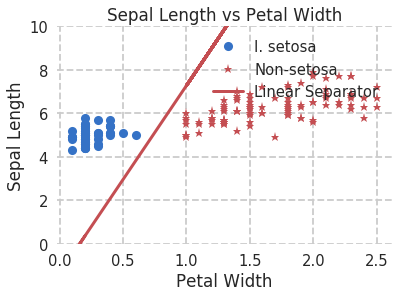

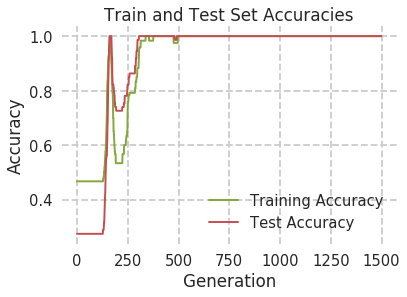

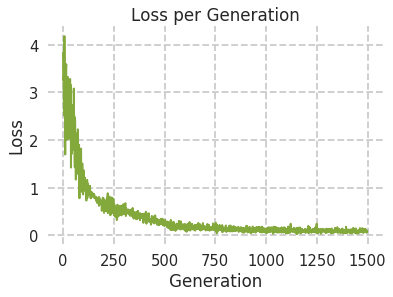

In [34]:

%matplotlib inline
# Plot data and line
plt.plot(setosa_x, setosa_y, 'o', label='I. setosa')
plt.plot(not_setosa_x, not_setosa_y, 'r*', label='Non-setosa')
plt.plot(x1_vals, best_fit, 'r-', label='Linear Separator', linewidth=3)
plt.ylim([0, 10])
plt.legend(loc='upper right')
plt.title('Sepal Length vs Petal Width')
plt.xlabel('Petal Width')
plt.ylabel('Sepal Length')
plt.show()

# Plot train/test accuracies
plt.plot(train_acc, 'g-', label='Training Accuracy')
plt.plot(test_acc, 'r-', label='Test Accuracy')
plt.title('Train and Test Set Accuracies')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot loss over time
plt.plot(loss_vec, 'g-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()